# Радиосистемы контроля и управления (РСКУ)

__Целью__ данной работы является разработка программного интерфейса (API - application programming interface), который упростит разработку программ моделирования систем радиоуправления с использованием языка программирования Python.</br>

In [2]:
from math import atan2, degrees, radians, tan, cos, sin, sqrt, pi
import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.patches as patches
import numpy as np

Данная работа основана на материалах _Семинара 1_ курса РСКУ в МГТУ им. Н. Э. Баумана

## Общая модель объекта

Программный интерфейс для моделирования систем радиоуправления представляет из себя набор классов. Методы этих Классов реализуют внутри себя вычисление основных параметров движения объекта. Реализован базовый класс ``Object`` в файле ``universal_model.py``, который вычисляет основные кинематические параметры объекта такие как скорость, угол вектора скорости относительно горизонтальной оси. Также ведет слежение за историей перемещения и имеет некоторые дополнительные функции.</br>
На основе базового класса формируется класс для целей перемещающийся по следующему закону:
$$x_1 = x_0 + V_x \Delta t + \frac{a_x t^2}{2}$$
$$y_1 = y_0 + V_y \Delta t + \frac{a_y t^2}{2}$$
Непосредственно закон перемещения объекта ``ObjectConstVelocity``, данного тела выглядит следующим образом:
$$x_1 = x_0 + v \cdot cos(\alpha) \cdot dT + \frac{a \cdot cos(\alpha - 90^{\circ}) \cdot dT^2}{2}$$
$$y_1 = y_0 + v \cdot sin(\alpha) \cdot dT + \frac{a \cdot sin(\alpha - 90^{\circ}) \cdot dT^2}{2}$$

Данная модель реализованна в отельном файле для удобства дальнейшего использования. Пример подключения файла с объектами модели представлен ниже.

In [3]:
from src.model.universal_model import Object
from src.model.universal_model import ObjectConstVelocity

Сформируем функции для построения графиков траекторий при помощи Matplotlib и Plotly. Plotly в отличии от Mattplotlib имеет возможность строить интерактивные графики даже в notebook. В данных функциях учтена структура объектов моделирования, что позволяет удобно её использовать. Эти функции реализованны в виде декораторов для большего удобства. Смысл в том, чтобы функции моделирования процесса возвращала объект, который наследовался от ``Object``.

In [4]:
def interact_plot(xmax, ymax):
    def decorator(func):
        def wrapper(*args, **kwargs):
            objects = func(*args, **kwargs)
            trajectories_graph_2(args[1], xmax, ymax, objects)
        return wrapper
    return decorator

def trajectories_graph_2(title, xmax, ymax, *objects):
    scatters = [go.Scatter(x=object.x, y=object.y, name=object.description) for object in objects[0]]

    fig = go.Figure(data=scatters,
                    layout=go.Layout(
                        xaxis=dict(range=[0, xmax]),  # Установка диапазона значений по оси X
                        yaxis=dict(range=[0, ymax])   # Установка диапазона значений по оси Y
                    ))
    fig.update_layout(title=title)

    fig.show()

In [5]:
def plot(xmax, ymax):
    def decorator(func):
        def wrapper(*args, **kwargs):
            objects = func(*args, **kwargs)
            trajectories_graph_2(args[1], xmax, ymax, objects)
        return wrapper
    return decorator

def trajectories_graph_2(title, xmax, ymax, *objects):
    fig, ax = plt.subplots(1,1)
    [plt.scatter(object.x, object.y, label=object.description) for object in objects[0]]

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")

    ax.set_xlim([0, xmax])
    ax.set_ylim([0, ymax])

    fig.set_size_inches(5, 5)
    plt.legend()
    plt.show()

In [6]:
def trajectories_graph(rocket, target, h_max, title, xmax, ymax):
    fig, ax = plt.subplots(1,1)

    plt.scatter(target.x, target.y, linewidth=2.0, marker=".", label=target.description)
    plt.scatter(rocket.x, rocket.y, linewidth=2.0, marker=".", label=rocket.description)
    
    circle = patches.Circle((rocket.x[-1], rocket.y[-1]), h_max, edgecolor='red',  fill = False )
    ax.add_patch(circle)

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")

    # # Добавление подписей номеров точек
    # for i, (x_val, y_val) in enumerate(zip(rocket.x, rocket.y)):
    #     plt.text(x_val, y_val, str((i+1)*ObjectConstVelocity.dT))

    ax.set_xlim([0, xmax])
    ax.set_ylim([0, ymax])

    fig.set_size_inches(5, 5)
    plt.legend()
    plt.show()


Функция для отображения параметров движения обьекта

In [7]:
def parameters_graph(distance, epsilon, derivative_distance, derivative_epsilon):
    fig, ax = plt.subplots(2,2, figsize=(10, 5))

    ax[0, 0].plot(distance, linewidth=2.0, marker=".")
    ax[0, 0].set_title("Дистанция $R$")
    ax[0, 0].set_ylabel("$R$")
    ax[0, 0].set_xlabel("шаг")
    # ax[0].legend(), 1

    ax[1, 0].plot(derivative_distance, linewidth=2.0, marker=".")
    ax[1, 0].set_title("Скорость сближения $\dot{R}$")
    ax[1, 0].set_ylabel("$\dot{R}(x)$")
    ax[1, 0].set_xlabel("шаг")
    # ax[0].legend()

    ax[0, 1].plot(np.rad2deg(epsilon), linewidth=2.0, marker=".")
    ax[0, 1].set_title("Угол визирования $\epsilon$")
    ax[0, 1].set_ylabel("$\epsilon$")
    ax[0, 1].set_xlabel("шаг")
    # ax[1].legend()

    ax[1, 1].plot(derivative_epsilon, linewidth=2.0, marker=".")
    ax[1, 1].set_title("Угловая скорость вращения ЛВ $\omega$")
    ax[1, 1].set_ylabel("$\dot{\epsilon}$")
    ax[1, 1].set_xlabel("шаг")
    # ax[1].legend()


    # ax.set_xlim([0, xmax])  # Установка диапазона значений по оси X
    # ax.set_ylim([0, ymax])  # Установка диапазона значений по оси Y

    fig.tight_layout()
    plt.show()


def parameters_graph_interact(distance, epsilon, derivative_distance, derivative_epsilon):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=list(range(len(distance))), y=distance, mode='lines', name='Дистанция R'))
    fig.update_layout(
        title='График дистанции R',
        xaxis=dict(title='шаг'),
        yaxis=dict(title='R')
    )
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(len(derivative_distance))), y=derivative_distance, mode='lines', name='Скорость сближения R'))
    fig.update_layout(
        title='График скорости сближения R',
        xaxis=dict(title='шаг'),
        yaxis=dict(title='Скорость сближения R')
    )
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(len(epsilon))), y=np.rad2deg(epsilon), mode='lines', name='Угол визирования epsilon'))
    fig.update_layout(
        title='График угла визирования epsilon',
        xaxis=dict(title='шаг'),
        yaxis=dict(title='epsilon')
    )
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(len(derivative_epsilon))), y=derivative_epsilon, mode='lines', name='Угловая скорость вращения ЛВ'))
    fig.update_layout(
        title='График угловой скорости вращения ЛВ',
        xaxis=dict(title='шаг'),
        yaxis=dict(title='Угловая скорость вращения ЛВ')
    )
    fig.show()

## Тесты для проверки корректности работы модели

### Тестирование формирования траектории цели

Начнем с проверки базового соответствия фактической траектории движения цели и требуемой. Для этого напишем следующую функцию которая принимает 2 конфигурационных файла для формирования экземпляра класса и последующего передвижения.

In [8]:
@interact_plot(80, 80)
def test_movement(max_time, test_title, *rockets_configs):
    rockets_list = [ObjectConstVelocity(**config_rocket) for config_rocket in  rockets_configs]

    dT = 1
    ObjectConstVelocity.setTimeStep(dT)
    time_step = ObjectConstVelocity.dT

    for time_i in range(max_time):
        for rocket in rockets_list:
            # перемещает объект
            rocket.nextMove()
            # пересчитаем направление вектора скорости так, как
            # на предыдущем шаге объект переместился и вектор скорости должен изменить своё направление
            rocket.getDirection()
    # trajectories_graph(*rockets_list, 0, test_title, 100, 100)
    return rockets_list

__Чек лист проверок:__</br>
Тестирование будем проводить по следующему плану.
1. Проверим изменения угла запуска цели движущейся прямолинейно.
1. Проверим изменения скорости в цели движущейся прямолинейно.
1. Сравним траектории цели движущейся прямолинейно и с поперечным ускорением.
Начнем с проверки изменения скорости

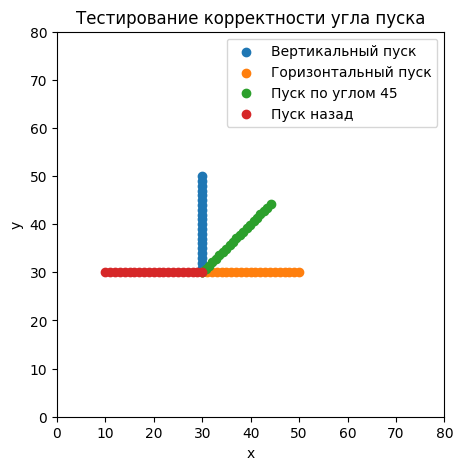

In [9]:
test_movement(20, "Тестирование корректности угла пуска",
       {'initialX': [30],
        'initialY': [30],
        'direction': 90,
        'velocity': 1,
        'acceleration': 0,
        'description': "Вертикальный пуск"},
       {'initialX': [30],
        'initialY': [30],
        'direction': 0, 
        'velocity': 1, 
        'acceleration': 0, 
        'description': "Горизонтальный пуск"},
       {'initialX': [30],
        'initialY': [30],
        'direction': 45,
        'velocity': 1,
        'acceleration': 0,
        'description': "Пуск по углом 45"},
       {'initialX': [30],
        'initialY': [30],
        'direction': 180,
        'velocity': 1,
        'acceleration': 0,
        'description': "Пуск назад"})
        

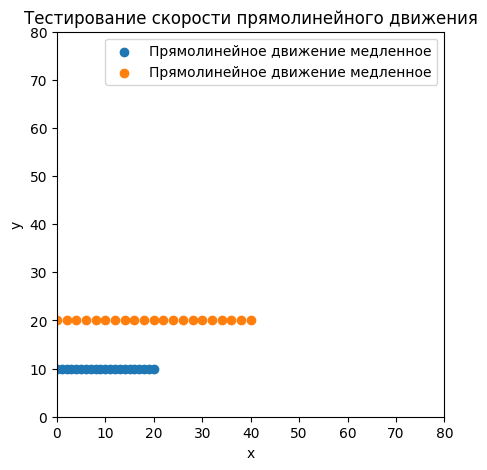

In [10]:

test_movement(20, "Тестирование скорости прямолинейного движения",
       {'initialX': [0],
        'initialY': [10],
        'direction': 0,
        'velocity': 1,
        'acceleration': 0,
        'description': "Прямолинейное движение медленное"},
       {'initialX': [0],
        'initialY': [20],
        'direction': 0, 
        'velocity': 2, 
        'acceleration': 0, 
        'description': "Прямолинейное движение медленное"})

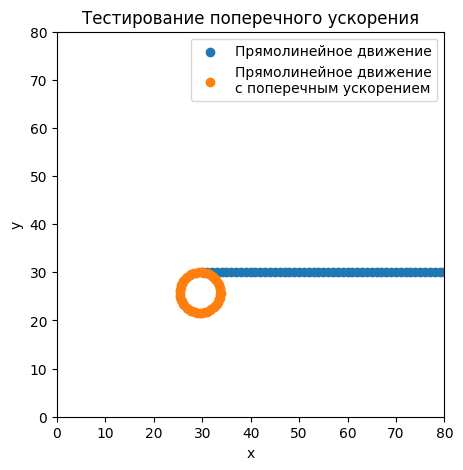

In [11]:

test_movement(50, "Тестирование поперечного ускорения",
       {'initialX': [30],
        'initialY': [30],
        'direction': 0,
        'velocity': 1,
        'acceleration': 0,
        'description': "Прямолинейное движение"},
       {'initialX': [30],
        'initialY': [30],
        'direction': 1, 
        'velocity': 1, 
        'acceleration': 0.5, 
        'description': "Прямолинейное движение\nс поперечным ускорением"})

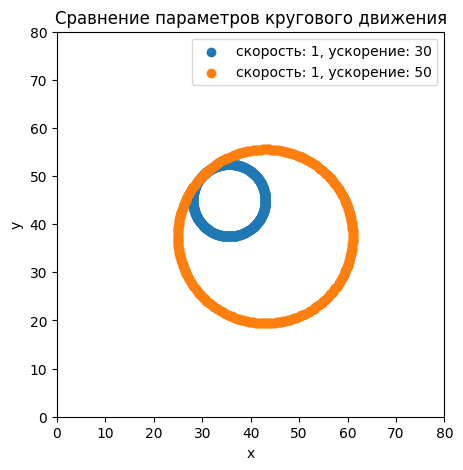

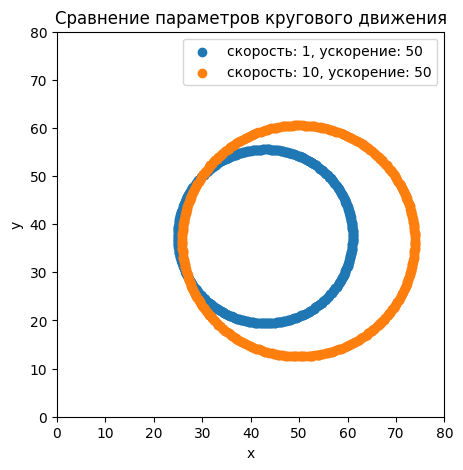

In [12]:
test_movement(500, "Сравнение параметров кругового движения",
       {'initialX': [30],
        'initialY': [50],
        'direction': 90,
        'velocity': 1,
        'acceleration': 20,
        'description': "скорость: 1, ускорение: 30"},
       {'initialX': [30],
        'initialY': [50],
        'direction': 90, 
        'velocity': 1, 
        'acceleration': 50, 
        'description': "скорость: 1, ускорение: 50"})


test_movement(500, "Сравнение параметров кругового движения",
       {'initialX': [30],
        'initialY': [50],
        'direction': 90,
        'velocity': 1,
        'acceleration': 50,
        'description': "скорость: 1, ускорение: 50"},
       {'initialX': [30],
        'initialY': [50],
        'direction': 90, 
        'velocity': 10, 
        'acceleration': 50, 
        'description': "скорость: 10, ускорение: 50"})

Таким образом, можно заметить, что траектория вычисляется корректно. 

### Тестирование формирователя измерений дальности и ЛВ

In [13]:
from src.model.line_view import *

Ниже представлена реализация общего теста. На основе него будут проверена корректность модели через изучения таких параметров как:
1. Угла наклона линии визирования(ЛВ) $\epsilon$, угловая скорость вращения ЛВ $\dot{\epsilon}$;
1. Дальность до цели $R$, скорость сближения с целью $\dot{R}$.

__Чек лист проверок:__</br>
Тестирование будем проводить по следующему плану.
1. Движение навстречу;
1. Движение вдогон;
1. Движение параллельными курсами сонаправленно;
1. Движение параллельными курсами разнонаправленно;
1. Движение под углом навстречу.
Начнем с проверки изменения скорости

In [14]:
@plot(80, 80)
def test_parameters(max_time, test_title , config_rocket, config_target):
    rocket = ObjectConstVelocity(**config_rocket)
    target = ObjectConstVelocity(**config_target)

    dT = 1
    ObjectConstVelocity.setTimeStep(dT)
    time_step = ObjectConstVelocity.dT

    rocket_target_LV = LineOfView(rocket, target)
    
    for i in range(max_time):
        target.nextMove()
        target.getDirection()
        rocket.nextMove()
        rocket.getDirection()
        rocket_target_LV.getAllParams()

    # parameters_graph_interact(rocket_target_LV.R,
    #                  rocket_target_LV.epsilon,
    #                  rocket_target_LV.derivative_R,
    #                  rocket_target_LV.derivative_epsilon)
    
    parameters_graph(rocket_target_LV.R,
                     rocket_target_LV.epsilon,
                     rocket_target_LV.derivative_R,
                     rocket_target_LV.derivative_epsilon)
    
    return rocket, target


__Тестирование навстречу__

Можно обратить внимание на следующее. Угол визирования и скорость вращения линии визирования не меняются (форма графика может смутить, однако стоит обратить внимание на размерность оси абсцисс). Дистанция между объектами уменьшается так, как они сближаться. Скорость сближения остается постоянной. Отрицательный знак скорости сближения также объясняется математически. Это производная функции функции расстояния между объектами, которая уменьшается со "временем", следовательно скорость сближения отрицательна. Хотя физически это не совсем верно. Таким образом, данный тестовый случай соответствует ожиданиям.</br>
Проведем аналитический расчет случая для сравнения результатов.</br>
$$S = 50$$
$$V_р = 1; V_ц = 1$$
Найдем расстояние между целями через 20 шагов с временным интервалом равным 1.
$$ S_{20} = S - (V_р +  V_ц)*\Delta t*20 = 50 - (1 + 1)*1*20 = 10 $$
Нетрудно также найти и скорость сближения цели и ОУ.
$$ V_{сбл} = V_р + V_ц = 1 + 1 = 2 $$
Модель показала аналогичный результат.

__Тестирование вдогон__

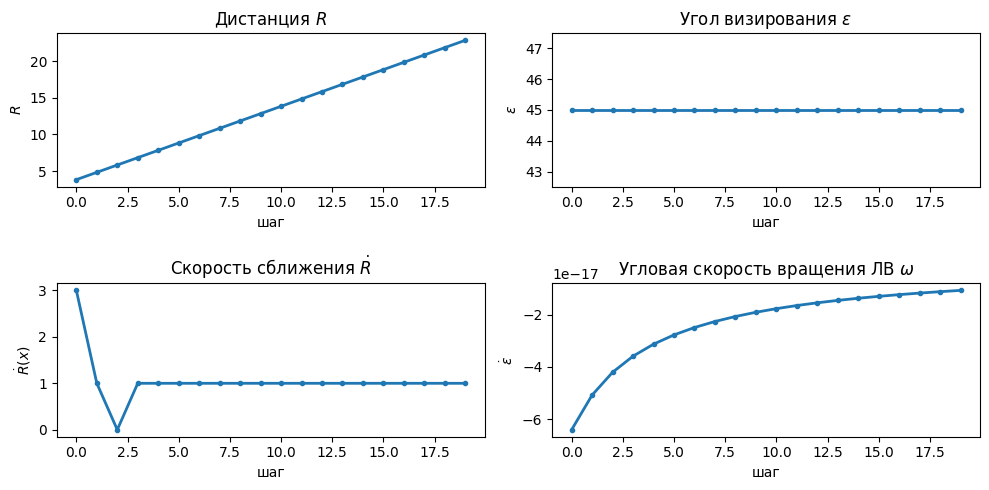

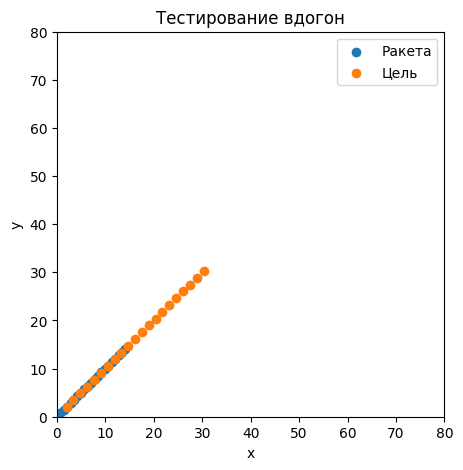

In [15]:
test_parameters(20, "Тестирование вдогон",
       {'initialX': [0], 'initialY': [0], 'direction': 45, 'velocity': 1, 'acceleration': 0, 'description': "Ракета"},
       {'initialX': [2], 'initialY': [2], 'direction':45, 'velocity': 2, 'acceleration': 0, 'description': "Цель"})

Данный случай в общем аналогичен предыдущему. Угол визирования примерно равен 45 градусам, угловая скорость вращения ЛВ примерно равна 0. Скорость сближения обратная положительна, по причине которая обговаривалась ранее(в данном случае цель удаляется от ОУ).</br>
Проведем аналитический расчет случая для сравнения результатов.</br>
$$S = \sqrt{(2 - 0)^2 + (2 - 0)^2} = 2$$
$$V_р = 1; V_ц = 2$$
Найдем расстояние между целями через 20 шагов с временным интервалом равным 1.
$$ S_{20} = S + V_ц*\Delta t*20 -  V_р*\Delta t*20 = 2 + 2*1*20 -  1*1*20 = 22$$
Модель показала аналогичный результат.
Нетрудно заметить, что скорость сближения также вычисляется корректно:
$$V_{сбл} = V_ц - V_р = 2 - 1 = 1$$

__Тестирование параллельными курсами сонаправлено__

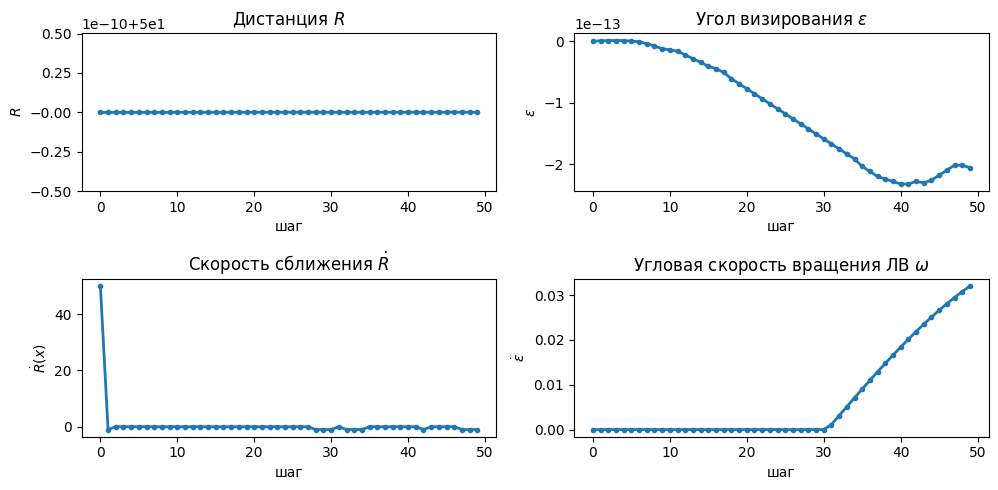

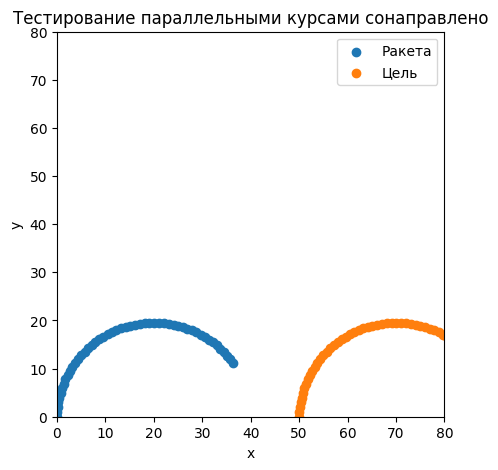

In [16]:
test_parameters(50,"Тестирование параллельными курсами сонаправлено",
       {'initialX': [0], 'initialY': [0], 'direction': 90, 'velocity': 1, 'acceleration': 0.1, 'description': "Ракета"},
       {'initialX': [50], 'initialY': [0], 'direction':90, 'velocity': 1, 'acceleration': 0.1, 'description': "Цель"})

В данном довольно сложном случае можно наблюдать, что параметры равны 0 и практически не меняются.

__Тестирование параллельными курсами разнонаправленно__

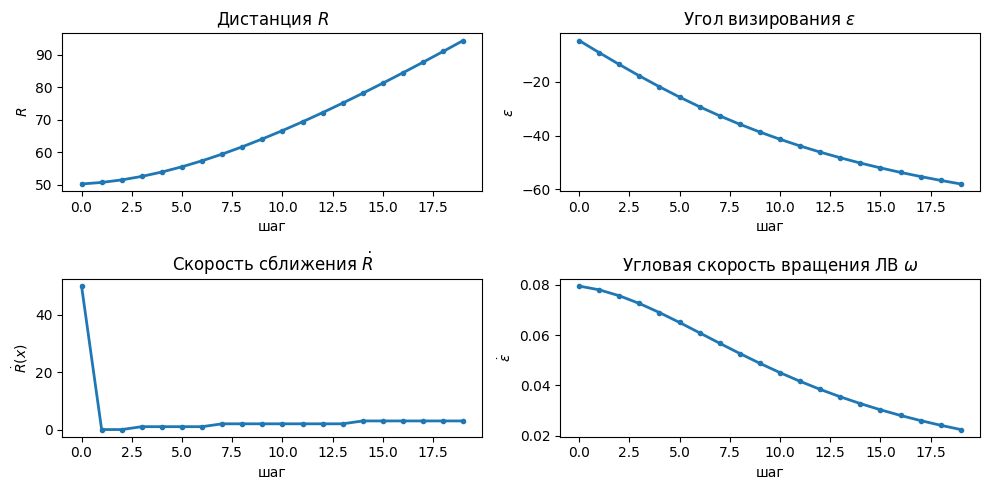

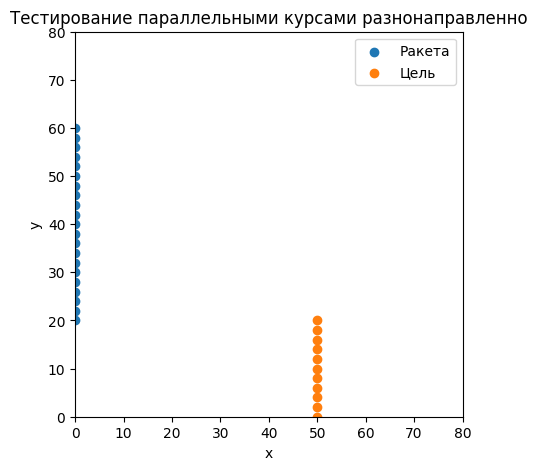

In [17]:
test_parameters(20, "Тестирование параллельными курсами разнонаправленно",
       {'initialX': [0], 'initialY': [20], 'direction': 90, 'velocity': 2, 'acceleration': 0, 'description': "Ракета"},
       {'initialX': [50], 'initialY': [20], 'direction':-90, 'velocity': 2, 'acceleration': 0, 'description': "Цель"})

Как можно заметить, параметры в данном тестовом сценарии меняются предсказуемо. Дистанция между объектами растет, с непостоянным значением, что логично. Угол визирования также раст Но в данном примере хотелось бы сравнить корректность расчета угла визирования.
```
    |       
    | 20
    |-----------|
        50      | 20
                |
```

Траектория представляет собой одинаковые прямоугольники со сторонами 20, 25 и $\sqrt{25^2 + 20^2} = 32.01$</br>
Таким образом, угол визирования можно вычислить:
$$\epsilon = arctan(\frac{25*2*1}{20*2*1}) = 51$$
Можно обратить внимание, что модель дает аналогичные значения.


__Тестирование под углом навстречу__

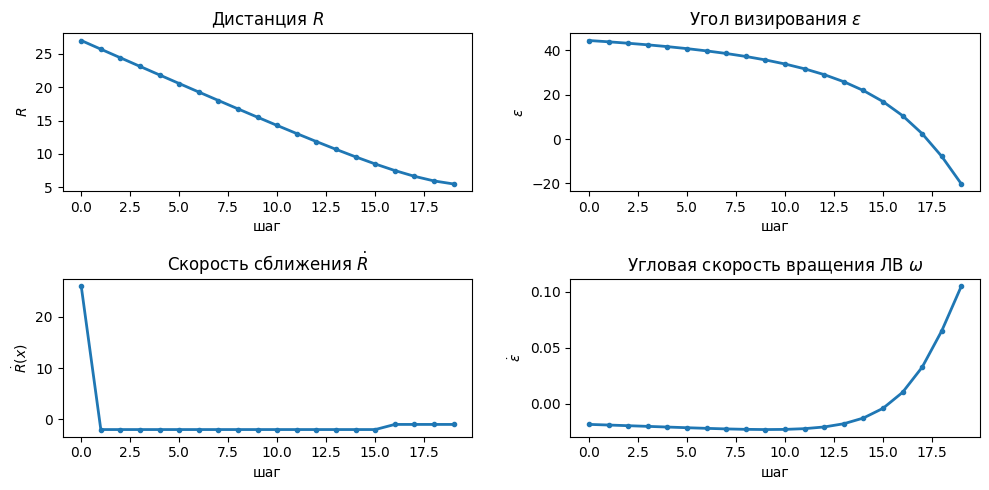

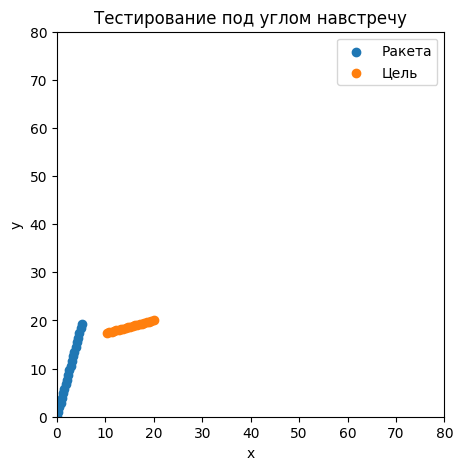

In [18]:
test_parameters(20, "Тестирование под углом навстречу",
       {'initialX': [0], 'initialY': [0], 'direction': 75, 'velocity': 1, 'acceleration': 0, 'description': "Ракета"},
       {'initialX': [20], 'initialY': [20], 'direction':-165, 'velocity': 0.5, 'acceleration': 0, 'description': "Цель"})

В данном примере хотелось продемонстрировать корректность расчета угловой скорости вращения ЛВ. Расчет будем проводить по следующей формуле(см. 5 лекцию):
$$V_p = 1; q_p = 30 [град]; V_ц = 0.5; q_ц = 30 [град]; T = 20$$
$$D = \sqrt{(V_p*\Delta t * T)^2 + (V_ц*\Delta t * T)^2 } = \sqrt{20^2 + 10^2} = 22.36 $$
$$\omega = \dot{\epsilon} = \frac{V_p sin(q_p) - V_ц sin(q_ц)}{D} = \frac{1*sin(30) - 0.5*sin(30)}{22.36} = \frac{0.25}{22.36} = 0.11 $$
Если посмотреть численные значения, то можно увидеть, что в начальный момент времени угловая скорость вращения ЛВ равно 0.19, что соответствует рассчитанному значению.


## Двухточечные методы наведения
В качестве демонстрации работоспособности модели приведем примеры реализации различных методов наведения, начнем с простых прямых методов.

### Прямой метод

Подключим реализацию прямого метода. Также напишем функцию визуализации траектории прямого метода.

In [19]:
from src.model.movement_models import direct

In [20]:
@plot(100,100)
def test_direct(max_time, test_title, h_max, config_rocket, config_target):
    # создаем объекты длят дальнейшего моделирования 
    rocket = ObjectConstVelocity(**config_rocket)
    target = ObjectConstVelocity(**config_target)

    # Задаем шкалу времени
    dT = 1
    ObjectConstVelocity.setTimeStep(dT)
    time_step = ObjectConstVelocity.dT

    # формируем линию визирования между объектом управления и целью
    rocket_target_LV = LineOfView(rocket, target)
    
    for i in range(max_time):
        # перемещаем объекты согласно параметрам движения, которое
        # были установленны на более ранних шагах.
        target.nextMove()
        rocket.nextMove()
        rocket_target_LV.getAllParams()

        # угол наклона вектора скорости цели
        vartheta = rocket.getDirection()
        # угол наклона линии визирования
        epsilon = rocket_target_LV.epsilon[-1]
        # получение параметра рассогласования
        delta = direct(vartheta, epsilon)
        # установим новое направление вектора скорости
        rocket.setDirection(vartheta - delta)

        # проверка попадания ракеты в цель
        if (abs(rocket_target_LV.R[-1]) < h_max):
            print("001 - промах в норме")
            break

    parameters_graph(rocket_target_LV.R,
                     rocket_target_LV.epsilon,
                     rocket_target_LV.derivative_R,
                     rocket_target_LV.derivative_epsilon)
    return target, rocket


001 - промах в норме


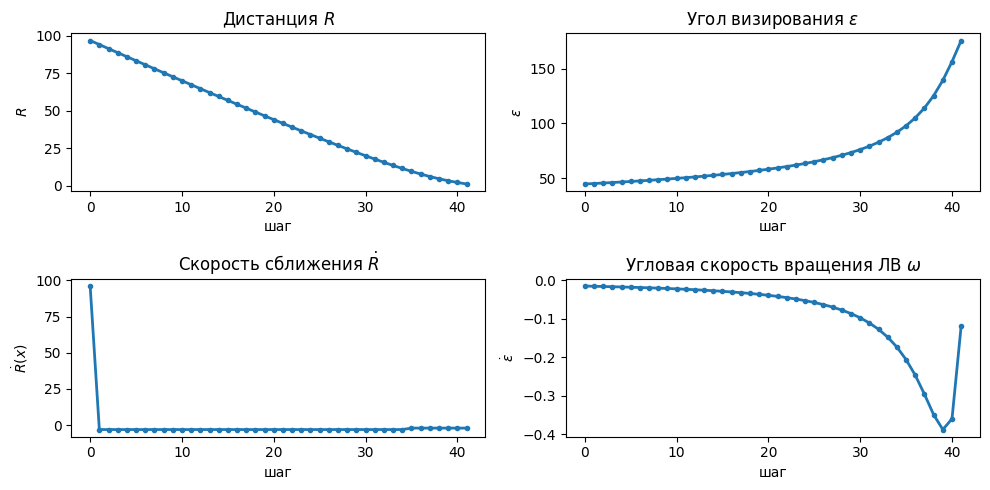

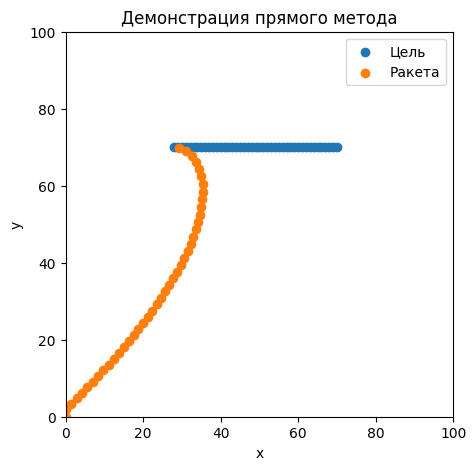

In [21]:
test_direct(100, "Демонстрация прямого метода", 2,
       {'initialX': [0], 'initialY': [0], 'direction': 90, 'velocity': 2, 'acceleration': 0, 'description': "Ракета"},
       {'initialX': [70], 'initialY': [70], 'direction':-180, 'velocity': 1, 'acceleration': 0, 'description': "Цель"})

001 - промах в норме


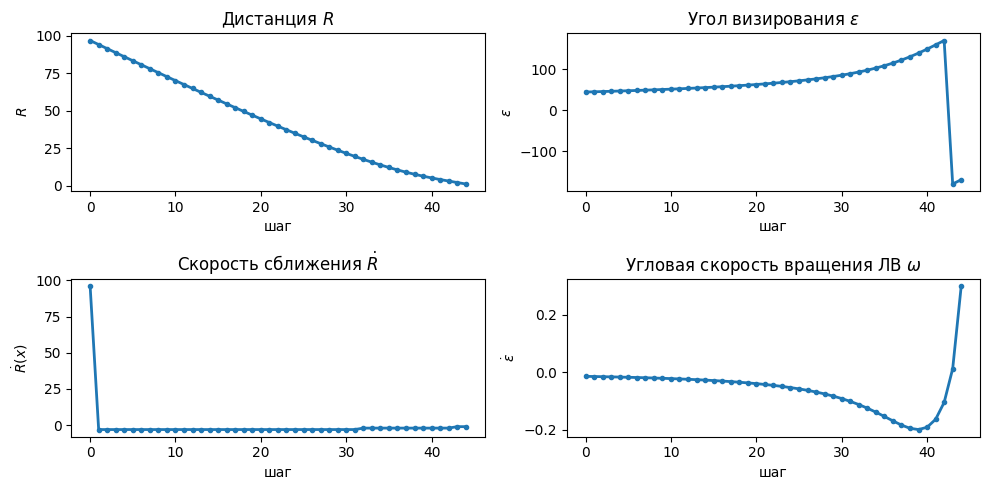

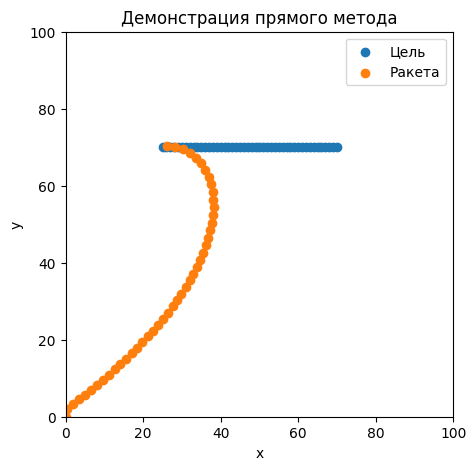

In [22]:
test_direct(100, "Демонстрация прямого метода", 2,
       {'initialX': [0], 'initialY': [0], 'direction': 90, 'velocity': 2, 'acceleration': 0.5, 'description': "Ракета"},
       {'initialX': [70], 'initialY': [70], 'direction':-180, 'velocity': 1, 'acceleration': 0, 'description': "Цель"})

### Метод прямого наведения с постоянным углом упреждения

In [23]:
from src.model.movement_models import directWithConstLeadAngle

In [24]:
@plot(100,100)
def test_directWithConstLeadAngle(max_time, test_title, h_max, angle, config_rocket, config_target):
    # создаем объекты длят дальнейшего моделирования 
    rocket = ObjectConstVelocity(**config_rocket) # ракета
    target = ObjectConstVelocity(**config_target) # цель

    # Задаем шкалу времени
    dT = 1
    ObjectConstVelocity.setTimeStep(dT)
    time_step = ObjectConstVelocity.dT

    # формируем линию визирования между объектом управления и целью
    rocket_target_LV = LineOfView(rocket, target)
    
    for i in range(max_time):
        # перемещаем объекты согласно параметрам движения, которое
        # были установленны на более ранних шагах.
        target.nextMove()
        rocket.nextMove()
        # получение параметров линии визирования
        rocket_target_LV.getAllParams()

        # угол наклона вектора скорости цели
        vartheta = rocket.getDirection()
        # угол наклона линии визирования
        epsilon = rocket_target_LV.epsilon[-1]
        # получение параметра рассогласования
        delta = directWithConstLeadAngle(vartheta, epsilon, radians(angle))
        # установим новое направление вектора скорости
        rocket.setDirection(vartheta - delta)

        # проверка попадания ракеты в цель
        if (abs(rocket_target_LV.R[-1]) < h_max):
            print("001 - промах в норме")
            break

    parameters_graph(rocket_target_LV.R,
                     rocket_target_LV.epsilon,
                     rocket_target_LV.derivative_R,
                     rocket_target_LV.derivative_epsilon)
    return target, rocket

001 - промах в норме


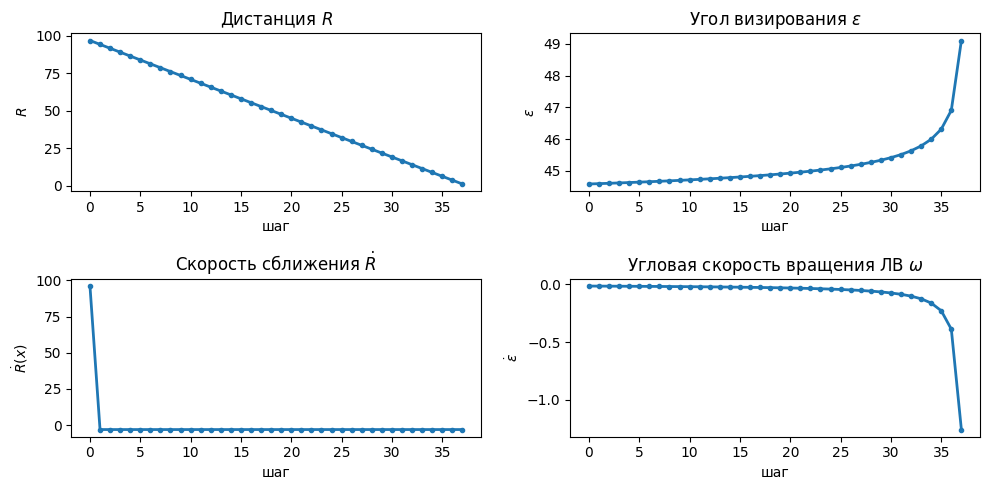

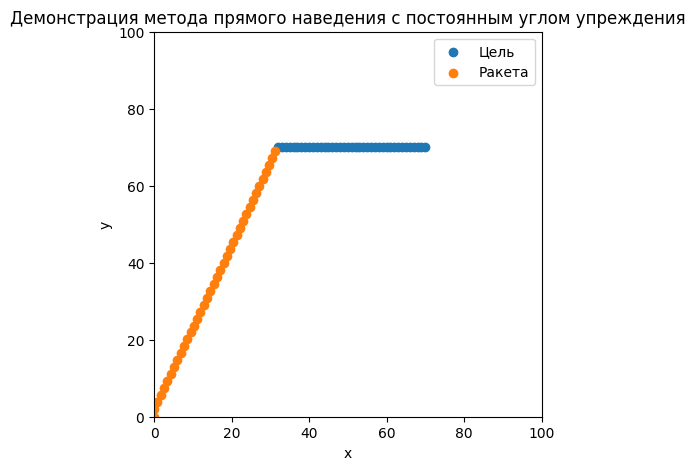

In [25]:
test_directWithConstLeadAngle(100, "Демонстрация метода прямого наведения с постоянным углом упреждения", 2, 20,
       {'initialX': [0], 'initialY': [0], 'direction': 90, 'velocity': 2, 'acceleration': 0, 'description': "Ракета"},
       {'initialX': [70], 'initialY': [70], 'direction':-180, 'velocity': 1, 'acceleration': 0, 'description': "Цель"})

### Метод параллельного сближения
Попробуем переписать метод прямого наведения в следующий вид:</br>
$$\Delta = \vartheta -  \epsilon = (\dot{\vartheta} -  \dot{\epsilon})\Delta t$$
$$\dot{\vartheta} = \omega = \frac{V_р  sin(q_р) - V_ц sin(q_ц)}{D}$$
$$ \dot{\epsilon} = \frac{j_н}{V_р} $$

In [26]:
@plot(500, 100)
def test_parallel(max_time, test_title, h_max, config_rocket, config_target):
    rocket = ObjectConstVelocity(**config_rocket)
    target = ObjectConstVelocity(**config_target)

    dT = 1
    ObjectConstVelocity.setTimeStep(dT)
    time_step = ObjectConstVelocity.dT

    rocket_target_LV = LineOfView(rocket, target)
    
    for i in range(max_time):
        target.nextMove()
        rocket.nextMove()
        rocket_target_LV.getAllParams()

        vartheta = rocket.getDirection()
        vartheta_derivative = rocket.acceleration/rocket.velocity
        epsilon_derivative = rocket_target_LV.derivative_epsilon[-1]
        delta = direct(vartheta_derivative, epsilon_derivative)*time_step
        rocket.setDirection(vartheta - delta)

        if (abs(rocket_target_LV.R[-1]) < h_max):
            print("001 - промах в норме")
            break

    parameters_graph(rocket_target_LV.R,
                     rocket_target_LV.epsilon,
                     rocket_target_LV.derivative_R,
                     rocket_target_LV.derivative_epsilon)
    return target, rocket

001 - промах в норме


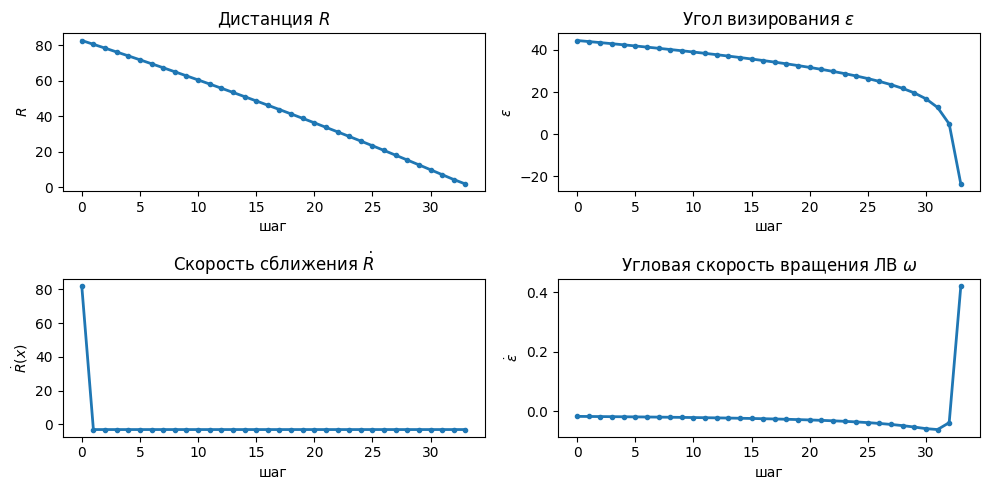

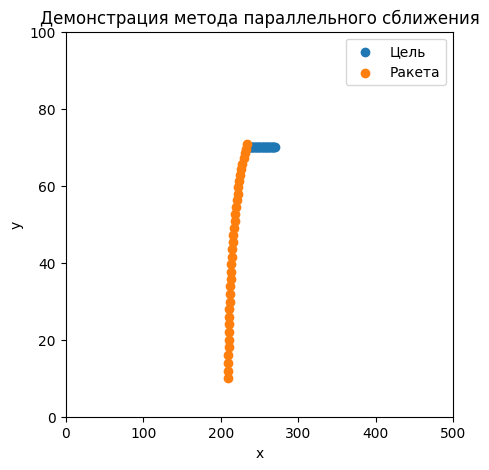

In [33]:
test_parallel(100, "Демонстрация метода параллельного сближения", 2,
       {'initialX': [210], 'initialY': [10], 'direction': 90, 'velocity': 2, 'acceleration': 0, 'description': "Ракета"},
       {'initialX': [270], 'initialY': [70], 'direction':-180, 'velocity': 1, 'acceleration': 0, 'description': "Цель"})

# test_parallel(100, "Демонстрация метода параллельного сближения", 2,
#        {'initialX': [210], 'initialY': [10], 'direction': 100, 'velocity': 2, 'acceleration': 0, 'description': "Ракета"},
#        {'initialX': [270], 'initialY': [70], 'direction':-180, 'velocity': 1, 'acceleration': 0, 'description': "Цель"})

## Трехточечные методы наведения

### Прямой метод

In [28]:
@plot(100,100)
def test_direct3(max_time, test_title, h_max, config_rocket, config_target, config_carrier):
    rocket = ObjectConstVelocity(**config_rocket)
    target = ObjectConstVelocity(**config_target)
    carrier = ObjectConstVelocity(**config_carrier)

    dT = 1
    ObjectConstVelocity.setTimeStep(dT)
    time_step = ObjectConstVelocity.dT

    rocket_LV = LineOfView(carrier, rocket)
    target_LV = LineOfView(carrier, target)
    distance_LV = LineOfView(rocket, target)


    
    for i in range(max_time):
        target.nextMove()
        rocket.nextMove()
        carrier.nextMove()
        rocket_LV.getAllParams()
        target_LV.getAllParams()
        distance_LV.getAllParams()


        varphi_t = radians(90) - target_LV.epsilon[-1]
        varphi_r = radians(90) - rocket_LV.epsilon[-1]

        R_t = target_LV.R[-1]
        R_r = rocket_LV.R[-1]

        z_t = R_t*math.sin(varphi_t)
        x_t = R_t*math.cos(varphi_t)

        z_r = R_r*math.sin(varphi_r)
        x_r = R_r*math.cos(varphi_r)

        psi_T = math.atan((z_t - z_r)/(x_t - x_r))
        rocket.setDirection(radians(90) - psi_T)

        if (abs(distance_LV.R[-1]) < h_max):
            print("001 - промах в норме")
            break
    return target, rocket, carrier

001 - промах в норме


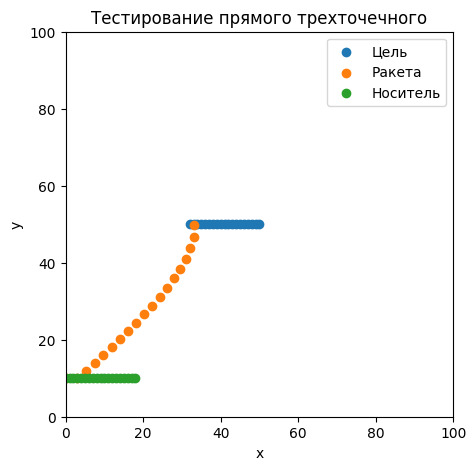

In [29]:
test_direct3(50, "Тестирование прямого трехточечного", 2,
       {'initialX': [0], 'initialY': [10], 'direction': 0, 'velocity': 3, 'acceleration': 0, 'description': "Ракета"},
       {'initialX': [50], 'initialY': [50], 'direction':180, 'velocity': 1, 'acceleration': 0, 'description': "Цель"},
       {'initialX': [0], 'initialY': [10], 'direction':0, 'velocity': 1, 'acceleration': 0, 'description': "Носитель"})

## Вывод
Таким образом, были продемонстрированы корректность работы данного программного интерфейса. И примеры применения для моделирования двухточечных и трехточечных методов управления. Это модель позволит удобно моделировать более сложные системы.